#### Carregando a base de dados

In [1]:
import pickle

with open(r'../_Material/Bases de dados/Bases pre-processadas/base_condicao_saude.pkl', mode = 'rb') as arquivo:
    x_previsores, y_classes = pickle.load( arquivo )

In [2]:
x_previsores

array([[1, 1, 1, 1, 1, 0],
       [2, 0, 1, 0, 0, 0],
       [2, 0, 0, 1, 0, 0],
       [2, 0, 2, 0, 0, 1],
       [0, 1, 2, 0, 1, 0],
       [2, 0, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0],
       [0, 0, 2, 1, 0, 1],
       [1, 0, 0, 1, 0, 0],
       [1, 1, 1, 0, 0, 1],
       [0, 1, 2, 0, 0, 1],
       [2, 0, 0, 1, 1, 1],
       [1, 0, 1, 0, 1, 0],
       [2, 1, 2, 1, 0, 1],
       [0, 1, 1, 0, 1, 0],
       [1, 1, 1, 0, 1, 0]], dtype=object)

In [3]:
y_classes

array(['Nao regular', 'Nao regular', 'Regular', 'Regular', 'Nao regular',
       'Regular', 'Nao regular', 'Regular', 'Regular', 'Nao regular',
       'Nao regular', 'Regular', 'Nao regular', 'Regular', 'Nao regular',
       'Nao regular'], dtype=object)

#### Aplicação do aprendizado

In [4]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [5]:
arvore_de_decisao = DecisionTreeClassifier( criterion = 'entropy' )  # Definindo critério como "entropia"

arvore_de_decisao.fit( x_previsores, y_classes )  # Treinando o modelo

DecisionTreeClassifier(criterion='entropy')

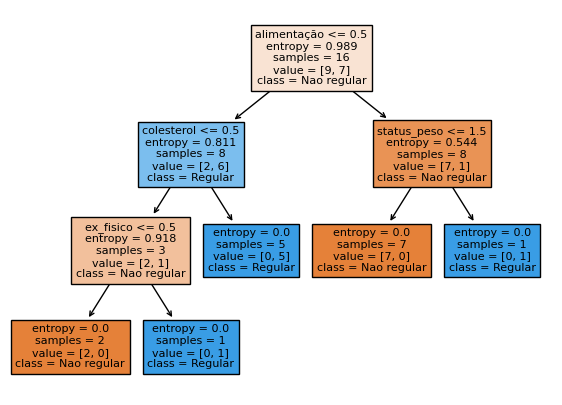

In [6]:
from matplotlib.pyplot import figure, subplots

figure, axes = subplots(nrows=1, ncols=1, figsize=(7, 5))  # Configurando o tamanho da janela

# Exibindo a estrutura da árvore gerada
plot_tree(
    arvore_de_decisao,  # Objeto do modelo      
    feature_names = ['status_peso', 'alimentação', 'p_sanguinea', 'colesterol', 'diabetes', 'ex_fisico'],  # Nome dos atributos da base de dados
    class_names = arvore_de_decisao.classes_.tolist(),  # Classes que o modelo deve prever
    filled = True  # Parâmetro de coloração do plot
);

#### Visualizando resultados do modelo

In [7]:
import pandas as pd

df = pd.read_csv(r'../_Material/Bases de dados/condicao_saude.csv')

# Variáveis para facilitar a compreensão do código
status_peso = dict(zip(  df.iloc[:, 1].values, x_previsores[:, 0]  ))
alimentacao = dict(zip(  df.iloc[:, 2].values, x_previsores[:, 1]  ))
pressao = dict(zip(  df.iloc[:, 3].values, x_previsores[:, 2]  ))
colesterol = dict(zip(  df.iloc[:, 4].values, x_previsores[:, 3]  ))
diabetes = dict(zip(  df.iloc[:, 5].values, x_previsores[:, 4]  ))
exercicio = dict(zip(  df.iloc[:, 6].values, x_previsores[:, 5]  ))

##### Passando registros que não estão na base de dados para que o algorítmo possa classificá-los

In [8]:
clientes_classificados = arvore_de_decisao.predict([

    [ # Primeiro paciente
        status_peso['Acima'],
        alimentacao['Desbalanceada'],
        pressao['Normal'],
        colesterol['Normal'],
        diabetes['Sim'],
        exercicio['Nao']
    ],

    [ # Segundo paciente
        status_peso['Regular'],
        alimentacao['Balanceada'],
        pressao['Normal'],
        colesterol['Normal'],
        diabetes['Sim'],
        exercicio['Sim']
    ]

])

In [9]:
print(f'Previsão de risco do modelo\n\nPrimeiro paciente: {clientes_classificados[0]}\nSegundo paciente:  {clientes_classificados[1]}')

Previsão de risco do modelo

Primeiro paciente: Nao regular
Segundo paciente:  Regular
